Week 5 of storytelling with data

In [3]:
#%pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/Patrick0481/Storytelling-with-Data/raw/refs/heads/main/NL_bicycle_sales.xlsx'
df = pd.read_excel(url)

print(df.head())

   Year  Regular bicycles   Hybrid bicycles   Kids bicycles  \
0  2013              0.50              0.08            0.13   
1  2014              0.51              0.07            0.12   
2  2015              0.42              0.05            0.14   
3  2016              0.43              0.06            0.12   
4  2017              0.42              0.05            0.12   

    Electric bicycles   Other bicycles  
0                0.19             0.10  
1                0.21             0.09  
2                0.28             0.11  
3                0.29             0.10  
4                0.31             0.10  


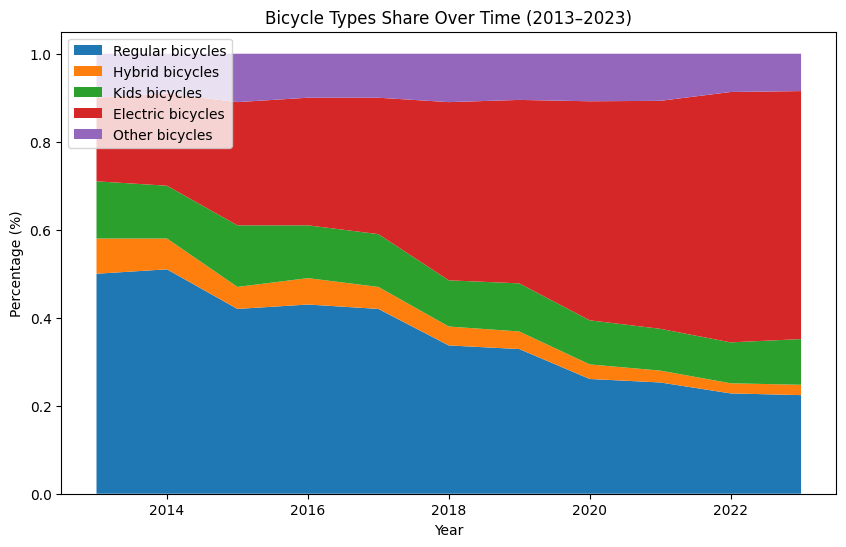

In [10]:
# Clean column names (remove spaces before/after)
df.columns = df.columns.str.strip()


# --- 1. Stacked Area Chart ---
plt.figure(figsize=(10,6))
plt.stackplot(
    df["Year"],
    df["Regular bicycles"],
    df["Hybrid bicycles"],
    df["Kids bicycles"],
    df["Electric bicycles"],
    df["Other bicycles"],
    labels=df.columns[1:]
)
plt.legend(loc="upper left")
plt.title("Bicycle Types Share Over Time (2013–2023)")
plt.ylabel("Percentage (%)")
plt.xlabel("Year")
plt.show()

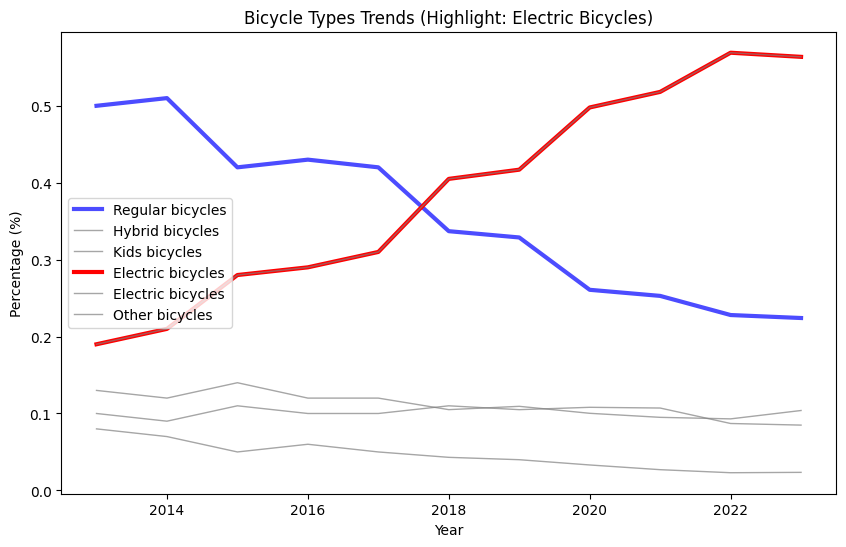

In [23]:
# --- 2. Line Chart Highlighting Electric Bicycles ---
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    if col == "Electric bicycles":
        plt.plot(df["Year"], df[col], label=col, linewidth=3, color="red")
    if col == "Regular bicycles":
        plt.plot(df["Year"], df[col], label=col, linewidth=3, color="blue", alpha=0.7)
    else:
        plt.plot(df["Year"], df[col], label=col, linewidth=1, color="gray", alpha=0.7)

plt.legend()
plt.title("Bicycle Types Trends (Highlight: Electric Bicycles)")
plt.ylabel("Percentage (%)")
plt.xlabel("Year")
plt.show()

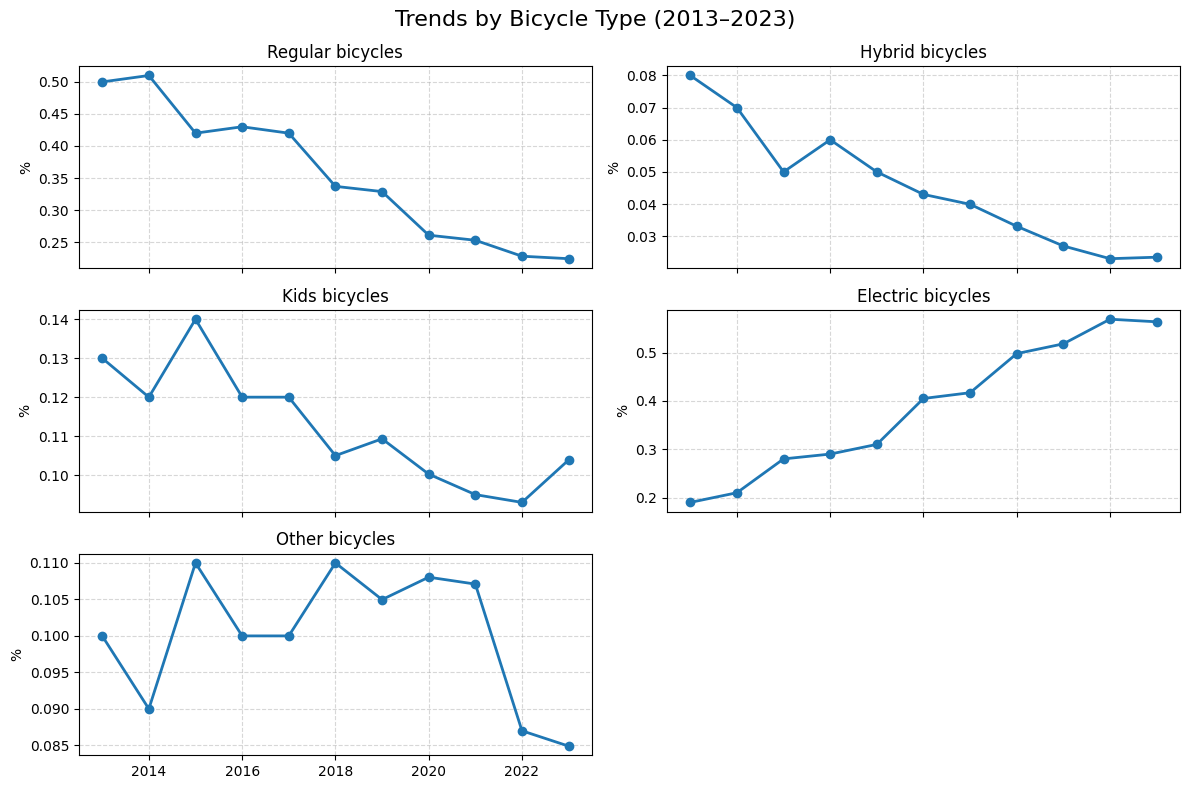

In [17]:
# --- 3. Small Multiples (Sparklines for each type) ---
fig, axes = plt.subplots(3, 2, figsize=(12,8), sharex=True)
axes = axes.flatten()

for i, col in enumerate(df.columns[1:]):
    axes[i].plot(df["Year"], df[col], marker="o", linewidth=2)
    axes[i].set_title(col)
    axes[i].set_ylabel("%")
    axes[i].grid(True, linestyle="--", alpha=0.5)

axes[-1].axis("off")  # empty last subplot
fig.suptitle("Trends by Bicycle Type (2013–2023)", fontsize=16)
plt.tight_layout()
plt.show()